# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp20 # use or create a database named demo
tweet_collection = db.lab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1323349157906653186
1323349159794135041
1323349159890558977
1323349160330993669
1323349160255315969
1323349160414875653
1323349160846856194
1323349162373439488
1323349161849225218
1323349162801405953
1323349163346710528
1323349163317383168
1323349162948087809
1323349163195641856
1323349165473034240
1323349166005882890
1323349165980717059
1323349166286901249
1323349167478050819
1323349167780016128
1323349168635711496
1323349169298378753
1323349169533308928
1323349171773022208
1323349172364496898
1323349173383692295
1323349173207552001
1323349174054719488
1323349174071496705
1323349174088249351
1323349174360952832
1323349176311259136
1323349175744962560
1323349176386834433
1323349177447972867
1323349177460531200
1323349177720623110
1323349177871552512
1323349178173530112
1323349178647543811
1323349179918389248
1323349179935166464
1323349180019019776
1323349180354580485
1323349182397190144
1323349182879588352
1323349182900436997
1323349183278075911
1323349184452415488
1323349185056382978


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 02 19:42:12 +0000 2020'
'Mon Nov 02 19:42:12 +0000 2020'
'Mon Nov 02 19:42:12 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:11 +0000 2020'
'Mon Nov 02 19:42:10 +0000 2020'
'Mon Nov 02 19:42:10 +0000 2020'
'Mon Nov 02 19:42:10 +0000 2020'
'Mon Nov 02 19:42:10 +0000 2020'
'Mon Nov 02 19:42:10 +0000 2020'
'Mon Nov 02 19:42:10 +0000 2020'
'Mon Nov 02 19:42:10 +0000 2020'
'Mon Nov 02 19:42:09 +0000 2020'
'Mon Nov 02 19:42:09 +0000 2020'
'Mon Nov 02 19:42:09 +0000 2020'
'Mon Nov 02 19:42:09 +0000 2020'
'Mon Nov 02 19:42:09 +0000 2020'
'Mon Nov 02 19:42:09 +0000 2020'
'Mon Nov 02 19:42:09 +0000 2020'
'Mon Nov 02 19:42:08 +0000 2020'
'Mon Nov 02 19:42:08 +0000 2020'
'Mon Nov 02 19:42:08 +0000 2020'
'Mon Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 02 19:41:57 +0000 2020'
'Mon Nov 02 19:41:57 +0000 2020'
'Mon Nov 02 19:41:57 +0000 2020'
'Mon Nov 02 19:41:57 +0000 2020'
'Mon Nov 02 19:41:57 +0000 2020'
'Mon Nov 02 19:41:57 +0000 2020'
'Mon Nov 02 19:41:57 +0000 2020'
'Mon Nov 02 19:41:57 +0000 2020'
'Mon Nov 02 19:41:56 +0000 2020'
'Mon Nov 02 19:41:56 +0000 2020'
'Mon Nov 02 19:41:56 +0000 2020'
'Mon Nov 02 19:41:56 +0000 2020'
'Mon Nov 02 19:41:56 +0000 2020'
'Mon Nov 02 19:41:56 +0000 2020'
'Mon Nov 02 19:41:55 +0000 2020'
'Mon Nov 02 19:41:55 +0000 2020'
'Mon Nov 02 19:41:55 +0000 2020'
'Mon Nov 02 19:41:55 +0000 2020'
'Mon Nov 02 19:41:55 +0000 2020'
'Mon Nov 02 19:41:55 +0000 2020'
'Mon Nov 02 19:41:55 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 02 19:41:54 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:41:13 +0000 2020'
'Mon Nov 02 19:41:13 +0000 2020'
'Mon Nov 02 19:41:13 +0000 2020'
'Mon Nov 02 19:41:12 +0000 2020'
'Mon Nov 02 19:41:12 +0000 2020'
'Mon Nov 02 19:41:11 +0000 2020'
'Mon Nov 02 19:41:11 +0000 2020'
'Mon Nov 02 19:41:11 +0000 2020'
'Mon Nov 02 19:41:11 +0000 2020'
'Mon Nov 02 19:41:11 +0000 2020'
'Mon Nov 02 19:41:11 +0000 2020'
'Mon Nov 02 19:41:10 +0000 2020'
'Mon Nov 02 19:41:10 +0000 2020'
'Mon Nov 02 19:41:10 +0000 2020'
'Mon Nov 02 19:41:10 +0000 2020'
'Mon Nov 02 19:41:10 +0000 2020'
'Mon Nov 02 19:41:10 +0000 2020'
'Mon Nov 02 19:41:10 +0000 2020'
'Mon Nov 02 19:41:10 +0000 2020'
'Mon Nov 02 19:41:09 +0000 2020'
'Mon Nov 02 19:41:09 +0000 2020'
'Mon Nov 02 19:41:09 +0000 2020'
'Mon Nov 02 19:41:09 +0000 2020'
'Mon Nov 02 19:41:09 +0000 2020'
'Mon Nov 02 19:41:09 +0000 2020'
'Mon Nov 02 19:41:08 +0000 2020'
'Mon Nov 02 19:41:08 +0000 2020'
'Mon Nov 02 19:41:08 +0000 2020'
'Mon Nov 02 19:41:08 +0000 2020'
'Mon Nov 02 19:41:07 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:40:23 +0000 2020'
'Mon Nov 02 19:40:12 +0000 2020'
'Mon Nov 02 19:40:00 +0000 2020'
'Mon Nov 02 19:40:00 +0000 2020'
'Mon Nov 02 19:40:00 +0000 2020'
'Mon Nov 02 19:40:00 +0000 2020'
'Mon Nov 02 19:40:00 +0000 2020'
'Mon Nov 02 19:39:59 +0000 2020'
'Mon Nov 02 19:39:59 +0000 2020'
'Mon Nov 02 19:39:59 +0000 2020'
'Mon Nov 02 19:39:58 +0000 2020'
'Mon Nov 02 19:39:58 +0000 2020'
'Mon Nov 02 19:39:58 +0000 2020'
'Mon Nov 02 19:39:57 +0000 2020'
'Mon Nov 02 19:39:57 +0000 2020'
'Mon Nov 02 19:39:57 +0000 2020'
'Mon Nov 02 19:39:57 +0000 2020'
'Mon Nov 02 19:39:57 +0000 2020'
'Mon Nov 02 19:39:56 +0000 2020'
'Mon Nov 02 19:39:56 +0000 2020'
'Mon Nov 02 19:39:56 +0000 2020'
'Mon Nov 02 19:39:56 +0000 2020'
'Mon Nov 02 19:39:56 +0000 2020'
'Mon Nov 02 19:39:56 +0000 2020'
'Mon Nov 02 19:39:56 +0000 2020'
'Mon Nov 02 19:39:55 +0000 2020'
'Mon Nov 02 19:39:55 +0000 2020'
'Mon Nov 02 19:39:54 +0000 2020'
'Mon Nov 02 19:39:54 +0000 2020'
'Mon Nov 02 19:39:54 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:39:05 +0000 2020'
'Mon Nov 02 19:39:05 +0000 2020'
'Mon Nov 02 19:39:05 +0000 2020'
'Mon Nov 02 19:39:04 +0000 2020'
'Mon Nov 02 19:39:04 +0000 2020'
'Mon Nov 02 19:39:04 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:03 +0000 2020'
'Mon Nov 02 19:39:02 +0000 2020'
'Mon Nov 02 19:39:02 +0000 2020'
'Mon Nov 02 19:39:02 +0000 2020'
'Mon Nov 02 19:39:02 +0000 2020'
'Mon Nov 02 19:39:02 +0000 2020'
'Mon Nov 02 19:39:02 +0000 2020'
'Mon Nov 02 19:39:02 +0000 2020'
'Mon Nov 02 19:39:02 +0000 2020'
'Mon Nov 02 19:39:01 +0000 2020'
'Mon Nov 02 19:39:01 +0000 2020'
'Mon Nov 02 19:39:01 +0000 2020'
'Mon Nov 02 19:39:01 +0000 2020'
'Mon Nov 02 19:39:01 +0000 2020'
'Mon Nov 02 19:39:01 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:38:17 +0000 2020'
'Mon Nov 02 19:38:17 +0000 2020'
'Mon Nov 02 19:38:16 +0000 2020'
'Mon Nov 02 19:38:16 +0000 2020'
'Mon Nov 02 19:38:16 +0000 2020'
'Mon Nov 02 19:38:16 +0000 2020'
'Mon Nov 02 19:38:16 +0000 2020'
'Mon Nov 02 19:38:16 +0000 2020'
'Mon Nov 02 19:38:15 +0000 2020'
'Mon Nov 02 19:38:15 +0000 2020'
'Mon Nov 02 19:38:15 +0000 2020'
'Mon Nov 02 19:38:15 +0000 2020'
'Mon Nov 02 19:38:15 +0000 2020'
'Mon Nov 02 19:38:14 +0000 2020'
'Mon Nov 02 19:38:14 +0000 2020'
'Mon Nov 02 19:38:14 +0000 2020'
'Mon Nov 02 19:38:13 +0000 2020'
'Mon Nov 02 19:38:13 +0000 2020'
'Mon Nov 02 19:38:13 +0000 2020'
'Mon Nov 02 19:38:13 +0000 2020'
'Mon Nov 02 19:38:13 +0000 2020'
'Mon Nov 02 19:38:13 +0000 2020'
'Mon Nov 02 19:38:13 +0000 2020'
'Mon Nov 02 19:38:12 +0000 2020'
'Mon Nov 02 19:38:12 +0000 2020'
'Mon Nov 02 19:38:12 +0000 2020'
'Mon Nov 02 19:38:12 +0000 2020'
'Mon Nov 02 19:38:12 +0000 2020'
'Mon Nov 02 19:38:12 +0000 2020'
'Mon Nov 02 19:38:11 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:37:23 +0000 2020'
'Mon Nov 02 19:37:23 +0000 2020'
'Mon Nov 02 19:37:23 +0000 2020'
'Mon Nov 02 19:37:23 +0000 2020'
'Mon Nov 02 19:37:23 +0000 2020'
'Mon Nov 02 19:37:23 +0000 2020'
'Mon Nov 02 19:37:22 +0000 2020'
'Mon Nov 02 19:37:22 +0000 2020'
'Mon Nov 02 19:37:22 +0000 2020'
'Mon Nov 02 19:37:22 +0000 2020'
'Mon Nov 02 19:37:22 +0000 2020'
'Mon Nov 02 19:37:21 +0000 2020'
'Mon Nov 02 19:37:21 +0000 2020'
'Mon Nov 02 19:37:21 +0000 2020'
'Mon Nov 02 19:37:21 +0000 2020'
'Mon Nov 02 19:37:20 +0000 2020'
'Mon Nov 02 19:37:20 +0000 2020'
'Mon Nov 02 19:37:20 +0000 2020'
'Mon Nov 02 19:37:20 +0000 2020'
'Mon Nov 02 19:37:19 +0000 2020'
'Mon Nov 02 19:37:19 +0000 2020'
'Mon Nov 02 19:37:19 +0000 2020'
'Mon Nov 02 19:37:19 +0000 2020'
'Mon Nov 02 19:37:18 +0000 2020'
'Mon Nov 02 19:37:18 +0000 2020'
'Mon Nov 02 19:37:17 +0000 2020'
'Mon Nov 02 19:37:17 +0000 2020'
'Mon Nov 02 19:37:17 +0000 2020'
'Mon Nov 02 19:37:17 +0000 2020'
'Mon Nov 02 19:37:16 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:36:33 +0000 2020'
'Mon Nov 02 19:36:33 +0000 2020'
'Mon Nov 02 19:36:33 +0000 2020'
'Mon Nov 02 19:36:32 +0000 2020'
'Mon Nov 02 19:36:32 +0000 2020'
'Mon Nov 02 19:36:32 +0000 2020'
'Mon Nov 02 19:36:32 +0000 2020'
'Mon Nov 02 19:36:32 +0000 2020'
'Mon Nov 02 19:36:32 +0000 2020'
'Mon Nov 02 19:36:31 +0000 2020'
'Mon Nov 02 19:36:31 +0000 2020'
'Mon Nov 02 19:36:31 +0000 2020'
'Mon Nov 02 19:36:31 +0000 2020'
'Mon Nov 02 19:36:31 +0000 2020'
'Mon Nov 02 19:36:31 +0000 2020'
'Mon Nov 02 19:36:31 +0000 2020'
'Mon Nov 02 19:36:30 +0000 2020'
'Mon Nov 02 19:36:30 +0000 2020'
'Mon Nov 02 19:36:30 +0000 2020'
'Mon Nov 02 19:36:30 +0000 2020'
'Mon Nov 02 19:36:29 +0000 2020'
'Mon Nov 02 19:36:29 +0000 2020'
'Mon Nov 02 19:36:29 +0000 2020'
'Mon Nov 02 19:36:28 +0000 2020'
'Mon Nov 02 19:36:28 +0000 2020'
'Mon Nov 02 19:36:27 +0000 2020'
'Mon Nov 02 19:36:27 +0000 2020'
'Mon Nov 02 19:36:27 +0000 2020'
'Mon Nov 02 19:36:26 +0000 2020'
'Mon Nov 02 19:36:26 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:35:40 +0000 2020'
'Mon Nov 02 19:35:40 +0000 2020'
'Mon Nov 02 19:35:40 +0000 2020'
'Mon Nov 02 19:35:40 +0000 2020'
'Mon Nov 02 19:35:40 +0000 2020'
'Mon Nov 02 19:35:40 +0000 2020'
'Mon Nov 02 19:35:39 +0000 2020'
'Mon Nov 02 19:35:39 +0000 2020'
'Mon Nov 02 19:35:39 +0000 2020'
'Mon Nov 02 19:35:39 +0000 2020'
'Mon Nov 02 19:35:39 +0000 2020'
'Mon Nov 02 19:35:39 +0000 2020'
'Mon Nov 02 19:35:38 +0000 2020'
'Mon Nov 02 19:35:38 +0000 2020'
'Mon Nov 02 19:35:38 +0000 2020'
'Mon Nov 02 19:35:38 +0000 2020'
'Mon Nov 02 19:35:37 +0000 2020'
'Mon Nov 02 19:35:37 +0000 2020'
'Mon Nov 02 19:35:37 +0000 2020'
'Mon Nov 02 19:35:37 +0000 2020'
'Mon Nov 02 19:35:36 +0000 2020'
'Mon Nov 02 19:35:36 +0000 2020'
'Mon Nov 02 19:35:36 +0000 2020'
'Mon Nov 02 19:35:35 +0000 2020'
'Mon Nov 02 19:35:35 +0000 2020'
'Mon Nov 02 19:35:35 +0000 2020'
'Mon Nov 02 19:35:35 +0000 2020'
'Mon Nov 02 19:35:35 +0000 2020'
'Mon Nov 02 19:35:35 +0000 2020'
'Mon Nov 02 19:35:35 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:34:53 +0000 2020'
'Mon Nov 02 19:34:53 +0000 2020'
'Mon Nov 02 19:34:53 +0000 2020'
'Mon Nov 02 19:34:53 +0000 2020'
'Mon Nov 02 19:34:53 +0000 2020'
'Mon Nov 02 19:34:53 +0000 2020'
'Mon Nov 02 19:34:53 +0000 2020'
'Mon Nov 02 19:34:52 +0000 2020'
'Mon Nov 02 19:34:52 +0000 2020'
'Mon Nov 02 19:34:52 +0000 2020'
'Mon Nov 02 19:34:52 +0000 2020'
'Mon Nov 02 19:34:52 +0000 2020'
'Mon Nov 02 19:34:51 +0000 2020'
'Mon Nov 02 19:34:51 +0000 2020'
'Mon Nov 02 19:34:51 +0000 2020'
'Mon Nov 02 19:34:51 +0000 2020'
'Mon Nov 02 19:34:50 +0000 2020'
'Mon Nov 02 19:34:50 +0000 2020'
'Mon Nov 02 19:34:49 +0000 2020'
'Mon Nov 02 19:34:49 +0000 2020'
'Mon Nov 02 19:34:48 +0000 2020'
'Mon Nov 02 19:34:48 +0000 2020'
'Mon Nov 02 19:34:48 +0000 2020'
'Mon Nov 02 19:34:48 +0000 2020'
'Mon Nov 02 19:34:48 +0000 2020'
'Mon Nov 02 19:34:47 +0000 2020'
'Mon Nov 02 19:34:47 +0000 2020'
'Mon Nov 02 19:34:47 +0000 2020'
'Mon Nov 02 19:34:47 +0000 2020'
'Mon Nov 02 19:34:47 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:33:59 +0000 2020'
'Mon Nov 02 19:33:59 +0000 2020'
'Mon Nov 02 19:33:59 +0000 2020'
'Mon Nov 02 19:33:59 +0000 2020'
'Mon Nov 02 19:33:58 +0000 2020'
'Mon Nov 02 19:33:58 +0000 2020'
'Mon Nov 02 19:33:58 +0000 2020'
'Mon Nov 02 19:33:58 +0000 2020'
'Mon Nov 02 19:33:57 +0000 2020'
'Mon Nov 02 19:33:57 +0000 2020'
'Mon Nov 02 19:33:57 +0000 2020'
'Mon Nov 02 19:33:57 +0000 2020'
'Mon Nov 02 19:33:57 +0000 2020'
'Mon Nov 02 19:33:56 +0000 2020'
'Mon Nov 02 19:33:56 +0000 2020'
'Mon Nov 02 19:33:56 +0000 2020'
'Mon Nov 02 19:33:56 +0000 2020'
'Mon Nov 02 19:33:56 +0000 2020'
'Mon Nov 02 19:33:56 +0000 2020'
'Mon Nov 02 19:33:56 +0000 2020'
'Mon Nov 02 19:33:56 +0000 2020'
'Mon Nov 02 19:33:55 +0000 2020'
'Mon Nov 02 19:33:55 +0000 2020'
'Mon Nov 02 19:33:55 +0000 2020'
'Mon Nov 02 19:33:55 +0000 2020'
'Mon Nov 02 19:33:55 +0000 2020'
'Mon Nov 02 19:33:55 +0000 2020'
'Mon Nov 02 19:33:55 +0000 2020'
'Mon Nov 02 19:33:55 +0000 2020'
'Mon Nov 02 19:33:54 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:33:03 +0000 2020'
'Mon Nov 02 19:33:03 +0000 2020'
'Mon Nov 02 19:33:03 +0000 2020'
'Mon Nov 02 19:33:03 +0000 2020'
'Mon Nov 02 19:33:02 +0000 2020'
'Mon Nov 02 19:33:02 +0000 2020'
'Mon Nov 02 19:33:02 +0000 2020'
'Mon Nov 02 19:33:02 +0000 2020'
'Mon Nov 02 19:33:02 +0000 2020'
'Mon Nov 02 19:33:02 +0000 2020'
'Mon Nov 02 19:33:02 +0000 2020'
'Mon Nov 02 19:33:01 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:33:00 +0000 2020'
'Mon Nov 02 19:32:59 +0000 2020'
'Mon Nov 02 19:32:59 +0000 2020'
'Mon Nov 02 19:32:59 +0000 2020'
'Mon Nov 02 19:32:58 +0000 2020'
'Mon Nov 02 19:32:58 +0000 2020'
'Mon Nov 02 19:32:58 +0000 2020'
'Mon Nov 02 19:32:57 +0000 2020'
'Mon Nov 02 19:32:57 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:32:08 +0000 2020'
'Mon Nov 02 19:32:08 +0000 2020'
'Mon Nov 02 19:32:08 +0000 2020'
'Mon Nov 02 19:32:08 +0000 2020'
'Mon Nov 02 19:32:07 +0000 2020'
'Mon Nov 02 19:32:07 +0000 2020'
'Mon Nov 02 19:32:07 +0000 2020'
'Mon Nov 02 19:32:07 +0000 2020'
'Mon Nov 02 19:32:07 +0000 2020'
'Mon Nov 02 19:32:07 +0000 2020'
'Mon Nov 02 19:32:06 +0000 2020'
'Mon Nov 02 19:32:06 +0000 2020'
'Mon Nov 02 19:32:06 +0000 2020'
'Mon Nov 02 19:32:06 +0000 2020'
'Mon Nov 02 19:32:06 +0000 2020'
'Mon Nov 02 19:32:05 +0000 2020'
'Mon Nov 02 19:32:05 +0000 2020'
'Mon Nov 02 19:32:05 +0000 2020'
'Mon Nov 02 19:32:05 +0000 2020'
'Mon Nov 02 19:32:05 +0000 2020'
'Mon Nov 02 19:32:05 +0000 2020'
'Mon Nov 02 19:32:04 +0000 2020'
'Mon Nov 02 19:32:04 +0000 2020'
'Mon Nov 02 19:32:03 +0000 2020'
'Mon Nov 02 19:32:03 +0000 2020'
'Mon Nov 02 19:32:03 +0000 2020'
'Mon Nov 02 19:32:03 +0000 2020'
'Mon Nov 02 19:32:03 +0000 2020'
'Mon Nov 02 19:32:03 +0000 2020'
'Mon Nov 02 19:32:03 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:31:19 +0000 2020'
'Mon Nov 02 19:31:19 +0000 2020'
'Mon Nov 02 19:31:19 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:18 +0000 2020'
'Mon Nov 02 19:31:17 +0000 2020'
'Mon Nov 02 19:31:17 +0000 2020'
'Mon Nov 02 19:31:17 +0000 2020'
'Mon Nov 02 19:31:17 +0000 2020'
'Mon Nov 02 19:31:17 +0000 2020'
'Mon Nov 02 19:31:16 +0000 2020'
'Mon Nov 02 19:31:16 +0000 2020'
'Mon Nov 02 19:31:16 +0000 2020'
'Mon Nov 02 19:31:16 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 02 19:31:15 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:30:33 +0000 2020'
'Mon Nov 02 19:30:33 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:32 +0000 2020'
'Mon Nov 02 19:30:31 +0000 2020'
'Mon Nov 02 19:30:31 +0000 2020'
'Mon Nov 02 19:30:31 +0000 2020'
'Mon Nov 02 19:30:31 +0000 2020'
'Mon Nov 02 19:30:31 +0000 2020'
'Mon Nov 02 19:30:30 +0000 2020'
'Mon Nov 02 19:30:30 +0000 2020'
'Mon Nov 02 19:30:30 +0000 2020'
'Mon Nov 02 19:30:30 +0000 2020'
'Mon Nov 02 19:30:29 +0000 2020'
'Mon Nov 02 19:30:29 +0000 2020'
'Mon Nov 02 19:30:29 +0000 2020'
'Mon Nov 02 19:30:29 +0000 2020'
'Mon Nov 02 19:30:29 +0000 2020'
'Mon Nov 02 19:30:29 +0000 2020'
'Mon Nov 02 19:30:29 +0000 2020'
'Mon Nov 02 19:30:28 +0000 2020'
'Mon Nov 02 19:30:28 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:29:57 +0000 2020'
'Mon Nov 02 19:29:57 +0000 2020'
'Mon Nov 02 19:29:57 +0000 2020'
'Mon Nov 02 19:29:57 +0000 2020'
'Mon Nov 02 19:29:57 +0000 2020'
'Mon Nov 02 19:29:57 +0000 2020'
'Mon Nov 02 19:29:56 +0000 2020'
'Mon Nov 02 19:29:56 +0000 2020'
'Mon Nov 02 19:29:55 +0000 2020'
'Mon Nov 02 19:29:55 +0000 2020'
'Mon Nov 02 19:29:55 +0000 2020'
'Mon Nov 02 19:29:55 +0000 2020'
'Mon Nov 02 19:29:55 +0000 2020'
'Mon Nov 02 19:29:55 +0000 2020'
'Mon Nov 02 19:29:55 +0000 2020'
'Mon Nov 02 19:29:55 +0000 2020'
'Mon Nov 02 19:29:54 +0000 2020'
'Mon Nov 02 19:29:54 +0000 2020'
'Mon Nov 02 19:29:54 +0000 2020'
'Mon Nov 02 19:29:54 +0000 2020'
'Mon Nov 02 19:29:54 +0000 2020'
'Mon Nov 02 19:29:53 +0000 2020'
'Mon Nov 02 19:29:53 +0000 2020'
'Mon Nov 02 19:29:53 +0000 2020'
'Mon Nov 02 19:29:53 +0000 2020'
'Mon Nov 02 19:29:53 +0000 2020'
'Mon Nov 02 19:29:53 +0000 2020'
'Mon Nov 02 19:29:52 +0000 2020'
'Mon Nov 02 19:29:52 +0000 2020'
'Mon Nov 02 19:29:52 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:29:05 +0000 2020'
'Mon Nov 02 19:29:05 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:04 +0000 2020'
'Mon Nov 02 19:29:03 +0000 2020'
'Mon Nov 02 19:29:03 +0000 2020'
'Mon Nov 02 19:29:03 +0000 2020'
'Mon Nov 02 19:29:03 +0000 2020'
'Mon Nov 02 19:29:03 +0000 2020'
'Mon Nov 02 19:29:03 +0000 2020'
'Mon Nov 02 19:29:03 +0000 2020'
'Mon Nov 02 19:29:03 +0000 2020'
'Mon Nov 02 19:29:02 +0000 2020'
'Mon Nov 02 19:29:02 +0000 2020'
'Mon Nov 02 19:29:02 +0000 2020'
'Mon Nov 02 19:29:02 +0000 2020'
'Mon Nov 02 19:29:02 +0000 2020'
'Mon Nov 02 19:29:02 +0000 2020'
'Mon Nov 02 19:29:01 +0000 2020'
'Mon Nov 02 19:29:01 +0000 2020'
'Mon Nov 02 19:29:01 +0000 2020'
'Mon Nov 02 19:29:01 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:28:17 +0000 2020'
'Mon Nov 02 19:28:17 +0000 2020'
'Mon Nov 02 19:28:17 +0000 2020'
'Mon Nov 02 19:28:17 +0000 2020'
'Mon Nov 02 19:28:17 +0000 2020'
'Mon Nov 02 19:28:17 +0000 2020'
'Mon Nov 02 19:28:16 +0000 2020'
'Mon Nov 02 19:28:16 +0000 2020'
'Mon Nov 02 19:28:16 +0000 2020'
'Mon Nov 02 19:28:16 +0000 2020'
'Mon Nov 02 19:28:16 +0000 2020'
'Mon Nov 02 19:28:15 +0000 2020'
'Mon Nov 02 19:28:15 +0000 2020'
'Mon Nov 02 19:28:15 +0000 2020'
'Mon Nov 02 19:28:15 +0000 2020'
'Mon Nov 02 19:28:15 +0000 2020'
'Mon Nov 02 19:28:14 +0000 2020'
'Mon Nov 02 19:28:14 +0000 2020'
'Mon Nov 02 19:28:14 +0000 2020'
'Mon Nov 02 19:28:13 +0000 2020'
'Mon Nov 02 19:28:13 +0000 2020'
'Mon Nov 02 19:28:13 +0000 2020'
'Mon Nov 02 19:28:12 +0000 2020'
'Mon Nov 02 19:28:12 +0000 2020'
'Mon Nov 02 19:28:11 +0000 2020'
'Mon Nov 02 19:28:11 +0000 2020'
'Mon Nov 02 19:28:11 +0000 2020'
'Mon Nov 02 19:28:11 +0000 2020'
'Mon Nov 02 19:28:11 +0000 2020'
'Mon Nov 02 19:28:10 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:27:26 +0000 2020'
'Mon Nov 02 19:27:26 +0000 2020'
'Mon Nov 02 19:27:26 +0000 2020'
'Mon Nov 02 19:27:25 +0000 2020'
'Mon Nov 02 19:27:25 +0000 2020'
'Mon Nov 02 19:27:25 +0000 2020'
'Mon Nov 02 19:27:25 +0000 2020'
'Mon Nov 02 19:27:25 +0000 2020'
'Mon Nov 02 19:27:24 +0000 2020'
'Mon Nov 02 19:27:24 +0000 2020'
'Mon Nov 02 19:27:24 +0000 2020'
'Mon Nov 02 19:27:24 +0000 2020'
'Mon Nov 02 19:27:24 +0000 2020'
'Mon Nov 02 19:27:24 +0000 2020'
'Mon Nov 02 19:27:23 +0000 2020'
'Mon Nov 02 19:27:23 +0000 2020'
'Mon Nov 02 19:27:23 +0000 2020'
'Mon Nov 02 19:27:23 +0000 2020'
'Mon Nov 02 19:27:23 +0000 2020'
'Mon Nov 02 19:27:22 +0000 2020'
'Mon Nov 02 19:27:22 +0000 2020'
'Mon Nov 02 19:27:22 +0000 2020'
'Mon Nov 02 19:27:21 +0000 2020'
'Mon Nov 02 19:27:21 +0000 2020'
'Mon Nov 02 19:27:21 +0000 2020'
'Mon Nov 02 19:27:21 +0000 2020'
'Mon Nov 02 19:27:21 +0000 2020'
'Mon Nov 02 19:27:21 +0000 2020'
'Mon Nov 02 19:27:21 +0000 2020'
'Mon Nov 02 19:27:20 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:26:25 +0000 2020'
'Mon Nov 02 19:26:25 +0000 2020'
'Mon Nov 02 19:26:25 +0000 2020'
'Mon Nov 02 19:26:25 +0000 2020'
'Mon Nov 02 19:26:25 +0000 2020'
'Mon Nov 02 19:26:25 +0000 2020'
'Mon Nov 02 19:26:25 +0000 2020'
'Mon Nov 02 19:26:24 +0000 2020'
'Mon Nov 02 19:26:24 +0000 2020'
'Mon Nov 02 19:26:24 +0000 2020'
'Mon Nov 02 19:26:23 +0000 2020'
'Mon Nov 02 19:26:23 +0000 2020'
'Mon Nov 02 19:26:23 +0000 2020'
'Mon Nov 02 19:26:22 +0000 2020'
'Mon Nov 02 19:26:22 +0000 2020'
'Mon Nov 02 19:26:22 +0000 2020'
'Mon Nov 02 19:26:22 +0000 2020'
'Mon Nov 02 19:26:21 +0000 2020'
'Mon Nov 02 19:26:21 +0000 2020'
'Mon Nov 02 19:26:21 +0000 2020'
'Mon Nov 02 19:26:21 +0000 2020'
'Mon Nov 02 19:26:21 +0000 2020'
'Mon Nov 02 19:26:21 +0000 2020'
'Mon Nov 02 19:26:20 +0000 2020'
'Mon Nov 02 19:26:20 +0000 2020'
'Mon Nov 02 19:26:20 +0000 2020'
'Mon Nov 02 19:26:20 +0000 2020'
'Mon Nov 02 19:26:20 +0000 2020'
'Mon Nov 02 19:26:19 +0000 2020'
'Mon Nov 02 19:26:19 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:25:36 +0000 2020'
'Mon Nov 02 19:25:36 +0000 2020'
'Mon Nov 02 19:25:36 +0000 2020'
'Mon Nov 02 19:25:35 +0000 2020'
'Mon Nov 02 19:25:35 +0000 2020'
'Mon Nov 02 19:25:35 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:34 +0000 2020'
'Mon Nov 02 19:25:33 +0000 2020'
'Mon Nov 02 19:25:33 +0000 2020'
'Mon Nov 02 19:25:33 +0000 2020'
'Mon Nov 02 19:25:32 +0000 2020'
'Mon Nov 02 19:25:32 +0000 2020'
'Mon Nov 02 19:25:32 +0000 2020'
'Mon Nov 02 19:25:32 +0000 2020'
'Mon Nov 02 19:25:31 +0000 2020'
'Mon Nov 02 19:25:31 +0000 2020'
'Mon Nov 02 19:25:31 +0000 2020'
'Mon Nov 02 19:25:31 +0000 2020'
'Mon Nov 02 19:25:31 +0000 2020'
'Mon Nov 02 19:25:30 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:24:50 +0000 2020'
'Mon Nov 02 19:24:50 +0000 2020'
'Mon Nov 02 19:24:50 +0000 2020'
'Mon Nov 02 19:24:50 +0000 2020'
'Mon Nov 02 19:24:50 +0000 2020'
'Mon Nov 02 19:24:50 +0000 2020'
'Mon Nov 02 19:24:49 +0000 2020'
'Mon Nov 02 19:24:49 +0000 2020'
'Mon Nov 02 19:24:49 +0000 2020'
'Mon Nov 02 19:24:49 +0000 2020'
'Mon Nov 02 19:24:49 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:48 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:47 +0000 2020'
'Mon Nov 02 19:24:46 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:24:03 +0000 2020'
'Mon Nov 02 19:24:03 +0000 2020'
'Mon Nov 02 19:24:03 +0000 2020'
'Mon Nov 02 19:24:03 +0000 2020'
'Mon Nov 02 19:24:03 +0000 2020'
'Mon Nov 02 19:24:02 +0000 2020'
'Mon Nov 02 19:24:02 +0000 2020'
'Mon Nov 02 19:24:02 +0000 2020'
'Mon Nov 02 19:24:02 +0000 2020'
'Mon Nov 02 19:24:01 +0000 2020'
'Mon Nov 02 19:24:01 +0000 2020'
'Mon Nov 02 19:24:01 +0000 2020'
'Mon Nov 02 19:24:01 +0000 2020'
'Mon Nov 02 19:24:01 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:24:00 +0000 2020'
'Mon Nov 02 19:23:59 +0000 2020'
'Mon Nov 02 19:23:59 +0000 2020'
'Mon Nov 02 19:23:59 +0000 2020'
'Mon Nov 02 19:23:59 +0000 2020'
'Mon Nov 02 19:23:59 +0000 2020'
'Mon Nov 02 19:23:59 +0000 2020'
'Mon Nov 02 19:23:58 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:23:16 +0000 2020'
'Mon Nov 02 19:23:16 +0000 2020'
'Mon Nov 02 19:23:16 +0000 2020'
'Mon Nov 02 19:23:16 +0000 2020'
'Mon Nov 02 19:23:15 +0000 2020'
'Mon Nov 02 19:23:15 +0000 2020'
'Mon Nov 02 19:23:15 +0000 2020'
'Mon Nov 02 19:23:15 +0000 2020'
'Mon Nov 02 19:23:14 +0000 2020'
'Mon Nov 02 19:23:14 +0000 2020'
'Mon Nov 02 19:23:14 +0000 2020'
'Mon Nov 02 19:23:14 +0000 2020'
'Mon Nov 02 19:23:13 +0000 2020'
'Mon Nov 02 19:23:13 +0000 2020'
'Mon Nov 02 19:23:13 +0000 2020'
'Mon Nov 02 19:23:13 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:12 +0000 2020'
'Mon Nov 02 19:23:11 +0000 2020'
'Mon Nov 02 19:23:11 +0000 2020'
'Mon Nov 02 19:23:10 +0000 2020'
'Mon Nov 02 19:23:10 +0000 2020'
'Mon Nov 02 19:23:10 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:22:26 +0000 2020'
'Mon Nov 02 19:22:26 +0000 2020'
'Mon Nov 02 19:22:25 +0000 2020'
'Mon Nov 02 19:22:25 +0000 2020'
'Mon Nov 02 19:22:25 +0000 2020'
'Mon Nov 02 19:22:25 +0000 2020'
'Mon Nov 02 19:22:25 +0000 2020'
'Mon Nov 02 19:22:24 +0000 2020'
'Mon Nov 02 19:22:24 +0000 2020'
'Mon Nov 02 19:22:24 +0000 2020'
'Mon Nov 02 19:22:24 +0000 2020'
'Mon Nov 02 19:22:24 +0000 2020'
'Mon Nov 02 19:22:24 +0000 2020'
'Mon Nov 02 19:22:24 +0000 2020'
'Mon Nov 02 19:22:23 +0000 2020'
'Mon Nov 02 19:22:23 +0000 2020'
'Mon Nov 02 19:22:23 +0000 2020'
'Mon Nov 02 19:22:23 +0000 2020'
'Mon Nov 02 19:22:23 +0000 2020'
'Mon Nov 02 19:22:23 +0000 2020'
'Mon Nov 02 19:22:23 +0000 2020'
'Mon Nov 02 19:22:22 +0000 2020'
'Mon Nov 02 19:22:22 +0000 2020'
'Mon Nov 02 19:22:22 +0000 2020'
'Mon Nov 02 19:22:21 +0000 2020'
'Mon Nov 02 19:22:21 +0000 2020'
'Mon Nov 02 19:22:21 +0000 2020'
'Mon Nov 02 19:22:20 +0000 2020'
'Mon Nov 02 19:22:20 +0000 2020'
'Mon Nov 02 19:22:20 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:21:32 +0000 2020'
'Mon Nov 02 19:21:32 +0000 2020'
'Mon Nov 02 19:21:32 +0000 2020'
'Mon Nov 02 19:21:31 +0000 2020'
'Mon Nov 02 19:21:31 +0000 2020'
'Mon Nov 02 19:21:31 +0000 2020'
'Mon Nov 02 19:21:31 +0000 2020'
'Mon Nov 02 19:21:31 +0000 2020'
'Mon Nov 02 19:21:31 +0000 2020'
'Mon Nov 02 19:21:31 +0000 2020'
'Mon Nov 02 19:21:31 +0000 2020'
'Mon Nov 02 19:21:30 +0000 2020'
'Mon Nov 02 19:21:30 +0000 2020'
'Mon Nov 02 19:21:30 +0000 2020'
'Mon Nov 02 19:21:30 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:29 +0000 2020'
'Mon Nov 02 19:21:28 +0000 2020'
'Mon Nov 02 19:21:28 +0000 2020'
'Mon Nov 02 19:21:28 +0000 2020'
'Mon Nov 02 19:21:28 +0000 2020'
'Mon Nov 02 19:21:27 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:20:48 +0000 2020'
'Mon Nov 02 19:20:47 +0000 2020'
'Mon Nov 02 19:20:47 +0000 2020'
'Mon Nov 02 19:20:47 +0000 2020'
'Mon Nov 02 19:20:47 +0000 2020'
'Mon Nov 02 19:20:47 +0000 2020'
'Mon Nov 02 19:20:47 +0000 2020'
'Mon Nov 02 19:20:46 +0000 2020'
'Mon Nov 02 19:20:46 +0000 2020'
'Mon Nov 02 19:20:46 +0000 2020'
'Mon Nov 02 19:20:46 +0000 2020'
'Mon Nov 02 19:20:45 +0000 2020'
'Mon Nov 02 19:20:45 +0000 2020'
'Mon Nov 02 19:20:45 +0000 2020'
'Mon Nov 02 19:20:45 +0000 2020'
'Mon Nov 02 19:20:45 +0000 2020'
'Mon Nov 02 19:20:44 +0000 2020'
'Mon Nov 02 19:20:44 +0000 2020'
'Mon Nov 02 19:20:44 +0000 2020'
'Mon Nov 02 19:20:44 +0000 2020'
'Mon Nov 02 19:20:44 +0000 2020'
'Mon Nov 02 19:20:44 +0000 2020'
'Mon Nov 02 19:20:44 +0000 2020'
'Mon Nov 02 19:20:44 +0000 2020'
'Mon Nov 02 19:20:43 +0000 2020'
'Mon Nov 02 19:20:43 +0000 2020'
'Mon Nov 02 19:20:43 +0000 2020'
'Mon Nov 02 19:20:43 +0000 2020'
'Mon Nov 02 19:20:42 +0000 2020'
'Mon Nov 02 19:20:42 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:20:04 +0000 2020'
'Mon Nov 02 19:20:04 +0000 2020'
'Mon Nov 02 19:20:04 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:03 +0000 2020'
'Mon Nov 02 19:20:02 +0000 2020'
'Mon Nov 02 19:20:02 +0000 2020'
'Mon Nov 02 19:20:02 +0000 2020'
'Mon Nov 02 19:20:02 +0000 2020'
'Mon Nov 02 19:20:02 +0000 2020'
'Mon Nov 02 19:20:02 +0000 2020'
'Mon Nov 02 19:20:02 +0000 2020'
'Mon Nov 02 19:20:02 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 02 19:20:01 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:19:14 +0000 2020'
'Mon Nov 02 19:19:14 +0000 2020'
'Mon Nov 02 19:19:14 +0000 2020'
'Mon Nov 02 19:19:14 +0000 2020'
'Mon Nov 02 19:19:14 +0000 2020'
'Mon Nov 02 19:19:13 +0000 2020'
'Mon Nov 02 19:19:13 +0000 2020'
'Mon Nov 02 19:19:13 +0000 2020'
'Mon Nov 02 19:19:13 +0000 2020'
'Mon Nov 02 19:19:13 +0000 2020'
'Mon Nov 02 19:19:13 +0000 2020'
'Mon Nov 02 19:19:13 +0000 2020'
'Mon Nov 02 19:19:12 +0000 2020'
'Mon Nov 02 19:19:12 +0000 2020'
'Mon Nov 02 19:19:12 +0000 2020'
'Mon Nov 02 19:19:12 +0000 2020'
'Mon Nov 02 19:19:12 +0000 2020'
'Mon Nov 02 19:19:11 +0000 2020'
'Mon Nov 02 19:19:11 +0000 2020'
'Mon Nov 02 19:19:11 +0000 2020'
'Mon Nov 02 19:19:11 +0000 2020'
'Mon Nov 02 19:19:11 +0000 2020'
'Mon Nov 02 19:19:10 +0000 2020'
'Mon Nov 02 19:19:10 +0000 2020'
'Mon Nov 02 19:19:10 +0000 2020'
'Mon Nov 02 19:19:09 +0000 2020'
'Mon Nov 02 19:19:09 +0000 2020'
'Mon Nov 02 19:19:09 +0000 2020'
'Mon Nov 02 19:19:09 +0000 2020'
'Mon Nov 02 19:19:09 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:18:25 +0000 2020'
'Mon Nov 02 19:18:25 +0000 2020'
'Mon Nov 02 19:18:25 +0000 2020'
'Mon Nov 02 19:18:25 +0000 2020'
'Mon Nov 02 19:18:25 +0000 2020'
'Mon Nov 02 19:18:25 +0000 2020'
'Mon Nov 02 19:18:24 +0000 2020'
'Mon Nov 02 19:18:24 +0000 2020'
'Mon Nov 02 19:18:24 +0000 2020'
'Mon Nov 02 19:18:23 +0000 2020'
'Mon Nov 02 19:18:22 +0000 2020'
'Mon Nov 02 19:18:22 +0000 2020'
'Mon Nov 02 19:18:22 +0000 2020'
'Mon Nov 02 19:18:22 +0000 2020'
'Mon Nov 02 19:18:22 +0000 2020'
'Mon Nov 02 19:18:21 +0000 2020'
'Mon Nov 02 19:18:21 +0000 2020'
'Mon Nov 02 19:18:21 +0000 2020'
'Mon Nov 02 19:18:21 +0000 2020'
'Mon Nov 02 19:18:21 +0000 2020'
'Mon Nov 02 19:18:21 +0000 2020'
'Mon Nov 02 19:18:21 +0000 2020'
'Mon Nov 02 19:18:20 +0000 2020'
'Mon Nov 02 19:18:20 +0000 2020'
'Mon Nov 02 19:18:20 +0000 2020'
'Mon Nov 02 19:18:20 +0000 2020'
'Mon Nov 02 19:18:20 +0000 2020'
'Mon Nov 02 19:18:19 +0000 2020'
'Mon Nov 02 19:18:19 +0000 2020'
'Mon Nov 02 19:18:19 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:26 +0000 2020'
'Mon Nov 02 19:06:25 +0000 2020'
'Mon Nov 02 19:06:25 +0000 2020'
'Mon Nov 02 19:06:25 +0000 2020'
'Mon Nov 02 19:06:25 +0000 2020'
'Mon Nov 02 19:06:25 +0000 2020'
'Mon Nov 02 19:06:25 +0000 2020'
'Mon Nov 02 19:06:25 +0000 2020'
'Mon Nov 02 19:06:24 +0000 2020'
'Mon Nov 02 19:06:24 +0000 2020'
'Mon Nov 02 19:06:24 +0000 2020'
'Mon Nov 02 19:06:24 +0000 2020'
'Mon Nov 02 19:06:24 +0000 2020'
'Mon Nov 02 19:06:24 +0000 2020'
'Mon Nov 02 19:06:24 +0000 2020'
'Mon Nov 02 19:06:23 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:05:45 +0000 2020'
'Mon Nov 02 19:05:45 +0000 2020'
'Mon Nov 02 19:05:45 +0000 2020'
'Mon Nov 02 19:05:45 +0000 2020'
'Mon Nov 02 19:05:45 +0000 2020'
'Mon Nov 02 19:05:45 +0000 2020'
'Mon Nov 02 19:05:45 +0000 2020'
'Mon Nov 02 19:05:45 +0000 2020'
'Mon Nov 02 19:05:44 +0000 2020'
'Mon Nov 02 19:05:44 +0000 2020'
'Mon Nov 02 19:05:44 +0000 2020'
'Mon Nov 02 19:05:43 +0000 2020'
'Mon Nov 02 19:05:43 +0000 2020'
'Mon Nov 02 19:05:43 +0000 2020'
'Mon Nov 02 19:05:43 +0000 2020'
'Mon Nov 02 19:05:43 +0000 2020'
'Mon Nov 02 19:05:43 +0000 2020'
'Mon Nov 02 19:05:42 +0000 2020'
'Mon Nov 02 19:05:42 +0000 2020'
'Mon Nov 02 19:05:42 +0000 2020'
'Mon Nov 02 19:05:42 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 02 19:05:41 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:05:08 +0000 2020'
'Mon Nov 02 19:05:08 +0000 2020'
'Mon Nov 02 19:05:08 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:07 +0000 2020'
'Mon Nov 02 19:05:06 +0000 2020'
'Mon Nov 02 19:05:06 +0000 2020'
'Mon Nov 02 19:05:06 +0000 2020'
'Mon Nov 02 19:05:06 +0000 2020'
'Mon Nov 02 19:05:06 +0000 2020'
'Mon Nov 02 19:05:06 +0000 2020'
'Mon Nov 02 19:05:06 +0000 2020'
'Mon Nov 02 19:05:05 +0000 2020'
'Mon Nov 02 19:05:05 +0000 2020'
'Mon Nov 02 19:05:05 +0000 2020'
'Mon Nov 02 19:05:04 +0000 2020'
'Mon Nov 02 19:05:04 +0000 2020'
'Mon Nov 02 19:05:04 +0000 2020'
'Mon Nov 02 19:05:04 +0000 2020'
'Mon Nov 02 19:05:04 +0000 2020'
'Mon Nov 02 19:05:04 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:04:24 +0000 2020'
'Mon Nov 02 19:04:24 +0000 2020'
'Mon Nov 02 19:04:23 +0000 2020'
'Mon Nov 02 19:04:23 +0000 2020'
'Mon Nov 02 19:04:23 +0000 2020'
'Mon Nov 02 19:04:23 +0000 2020'
'Mon Nov 02 19:04:23 +0000 2020'
'Mon Nov 02 19:04:23 +0000 2020'
'Mon Nov 02 19:04:23 +0000 2020'
'Mon Nov 02 19:04:22 +0000 2020'
'Mon Nov 02 19:04:22 +0000 2020'
'Mon Nov 02 19:04:22 +0000 2020'
'Mon Nov 02 19:04:22 +0000 2020'
'Mon Nov 02 19:04:22 +0000 2020'
'Mon Nov 02 19:04:21 +0000 2020'
'Mon Nov 02 19:04:21 +0000 2020'
'Mon Nov 02 19:04:21 +0000 2020'
'Mon Nov 02 19:04:21 +0000 2020'
'Mon Nov 02 19:04:21 +0000 2020'
'Mon Nov 02 19:04:20 +0000 2020'
'Mon Nov 02 19:04:20 +0000 2020'
'Mon Nov 02 19:04:20 +0000 2020'
'Mon Nov 02 19:04:20 +0000 2020'
'Mon Nov 02 19:04:19 +0000 2020'
'Mon Nov 02 19:04:19 +0000 2020'
'Mon Nov 02 19:04:19 +0000 2020'
'Mon Nov 02 19:04:19 +0000 2020'
'Mon Nov 02 19:04:19 +0000 2020'
'Mon Nov 02 19:04:19 +0000 2020'
'Mon Nov 02 19:04:19 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:03:40 +0000 2020'
'Mon Nov 02 19:03:40 +0000 2020'
'Mon Nov 02 19:03:40 +0000 2020'
'Mon Nov 02 19:03:40 +0000 2020'
'Mon Nov 02 19:03:39 +0000 2020'
'Mon Nov 02 19:03:39 +0000 2020'
'Mon Nov 02 19:03:39 +0000 2020'
'Mon Nov 02 19:03:39 +0000 2020'
'Mon Nov 02 19:03:39 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:38 +0000 2020'
'Mon Nov 02 19:03:37 +0000 2020'
'Mon Nov 02 19:03:37 +0000 2020'
'Mon Nov 02 19:03:37 +0000 2020'
'Mon Nov 02 19:03:37 +0000 2020'
'Mon Nov 02 19:03:37 +0000 2020'
'Mon Nov 02 19:03:36 +0000 2020'
'Mon Nov 02 19:03:36 +0000 2020'
'Mon Nov 02 19:03:36 +0000 2020'
'Mon Nov 02 19:03:36 +0000 2020'
'Mon Nov 02 19:03:36 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:03:00 +0000 2020'
'Mon Nov 02 19:03:00 +0000 2020'
'Mon Nov 02 19:03:00 +0000 2020'
'Mon Nov 02 19:03:00 +0000 2020'
'Mon Nov 02 19:03:00 +0000 2020'
'Mon Nov 02 19:03:00 +0000 2020'
'Mon Nov 02 19:03:00 +0000 2020'
'Mon Nov 02 19:03:00 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:59 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:58 +0000 2020'
'Mon Nov 02 19:02:57 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:22 +0000 2020'
'Mon Nov 02 19:02:21 +0000 2020'
'Mon Nov 02 19:02:21 +0000 2020'
'Mon Nov 02 19:02:21 +0000 2020'
'Mon Nov 02 19:02:21 +0000 2020'
'Mon Nov 02 19:02:21 +0000 2020'
'Mon Nov 02 19:02:21 +0000 2020'
'Mon Nov 02 19:02:21 +0000 2020'
'Mon Nov 02 19:02:21 +0000 2020'
'Mon Nov 02 19:02:20 +0000 2020'
'Mon Nov 02 19:02:20 +0000 2020'
'Mon Nov 02 19:02:20 +0000 2020'
'Mon Nov 02 19:02:20 +0000 2020'
'Mon Nov 02 19:02:20 +0000 2020'
'Mon Nov 02 19:02:20 +0000 2020'
'Mon Nov 02 19:02:20 +0000 2020'
'Mon Nov 02 19:02:20 +0000 2020'
'Mon Nov 02 19:02:19 +0000 2020'
'Mon Nov 02 19:02:19 +0000 2020'
'Mon Nov 02 19:02:19 +0000 2020'
'Mon Nov 02 19:02:19 +0000 2020'
'Mon Nov 02 19:02:19 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:01:44 +0000 2020'
'Mon Nov 02 19:01:44 +0000 2020'
'Mon Nov 02 19:01:44 +0000 2020'
'Mon Nov 02 19:01:42 +0000 2020'
'Mon Nov 02 19:01:42 +0000 2020'
'Mon Nov 02 19:01:42 +0000 2020'
'Mon Nov 02 19:01:42 +0000 2020'
'Mon Nov 02 19:01:42 +0000 2020'
'Mon Nov 02 19:01:42 +0000 2020'
'Mon Nov 02 19:01:42 +0000 2020'
'Mon Nov 02 19:01:41 +0000 2020'
'Mon Nov 02 19:01:41 +0000 2020'
'Mon Nov 02 19:01:41 +0000 2020'
'Mon Nov 02 19:01:41 +0000 2020'
'Mon Nov 02 19:01:41 +0000 2020'
'Mon Nov 02 19:01:41 +0000 2020'
'Mon Nov 02 19:01:41 +0000 2020'
'Mon Nov 02 19:01:40 +0000 2020'
'Mon Nov 02 19:01:40 +0000 2020'
'Mon Nov 02 19:01:40 +0000 2020'
'Mon Nov 02 19:01:40 +0000 2020'
'Mon Nov 02 19:01:40 +0000 2020'
'Mon Nov 02 19:01:40 +0000 2020'
'Mon Nov 02 19:01:40 +0000 2020'
'Mon Nov 02 19:01:40 +0000 2020'
'Mon Nov 02 19:01:39 +0000 2020'
'Mon Nov 02 19:01:39 +0000 2020'
'Mon Nov 02 19:01:39 +0000 2020'
'Mon Nov 02 19:01:39 +0000 2020'
'Mon Nov 02 19:01:38 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:01:01 +0000 2020'
'Mon Nov 02 19:01:01 +0000 2020'
'Mon Nov 02 19:01:00 +0000 2020'
'Mon Nov 02 19:01:00 +0000 2020'
'Mon Nov 02 19:01:00 +0000 2020'
'Mon Nov 02 19:01:00 +0000 2020'
'Mon Nov 02 19:01:00 +0000 2020'
'Mon Nov 02 19:01:00 +0000 2020'
'Mon Nov 02 19:01:00 +0000 2020'
'Mon Nov 02 19:01:00 +0000 2020'
'Mon Nov 02 19:00:59 +0000 2020'
'Mon Nov 02 19:00:59 +0000 2020'
'Mon Nov 02 19:00:59 +0000 2020'
'Mon Nov 02 19:00:59 +0000 2020'
'Mon Nov 02 19:00:58 +0000 2020'
'Mon Nov 02 19:00:58 +0000 2020'
'Mon Nov 02 19:00:58 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:57 +0000 2020'
'Mon Nov 02 19:00:56 +0000 2020'
'Mon Nov 02 19:00:56 +0000 2020'
'Mon Nov 02 19:00:55 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:00:23 +0000 2020'
'Mon Nov 02 19:00:22 +0000 2020'
'Mon Nov 02 19:00:22 +0000 2020'
'Mon Nov 02 19:00:21 +0000 2020'
'Mon Nov 02 19:00:21 +0000 2020'
'Mon Nov 02 19:00:21 +0000 2020'
'Mon Nov 02 19:00:21 +0000 2020'
'Mon Nov 02 19:00:21 +0000 2020'
'Mon Nov 02 19:00:21 +0000 2020'
'Mon Nov 02 19:00:20 +0000 2020'
'Mon Nov 02 19:00:20 +0000 2020'
'Mon Nov 02 19:00:20 +0000 2020'
'Mon Nov 02 19:00:20 +0000 2020'
'Mon Nov 02 19:00:20 +0000 2020'
'Mon Nov 02 19:00:20 +0000 2020'
'Mon Nov 02 19:00:20 +0000 2020'
'Mon Nov 02 19:00:20 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:19 +0000 2020'
'Mon Nov 02 19:00:18 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:59:52 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:51 +0000 2020'
'Mon Nov 02 18:59:50 +0000 2020'
'Mon Nov 02 18:59:50 +0000 2020'
'Mon Nov 02 18:59:50 +0000 2020'
'Mon Nov 02 18:59:50 +0000 2020'
'Mon Nov 02 18:59:50 +0000 2020'
'Mon Nov 02 18:59:50 +0000 2020'
'Mon Nov 02 18:59:49 +0000 2020'
'Mon Nov 02 18:59:49 +0000 2020'
'Mon Nov 02 18:59:49 +0000 2020'
'Mon Nov 02 18:59:49 +0000 2020'
'Mon Nov 02 18:59:48 +0000 2020'
'Mon Nov 02 18:59:48 +0000 2020'
'Mon Nov 02 18:59:48 +0000 2020'
'Mon Nov 02 18:59:48 +0000 2020'
'Mon Nov 02 18:59:48 +0000 2020'
'Mon Nov 02 18:59:48 +0000 2020'
'Mon Nov 02 18:59:47 +0000 2020'
'Mon Nov 02 18:59:47 +0000 2020'
'Mon Nov 02 18:59:47 +0000 2020'
'Mon Nov 02 18:59:47 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:59:09 +0000 2020'
'Mon Nov 02 18:59:08 +0000 2020'
'Mon Nov 02 18:59:08 +0000 2020'
'Mon Nov 02 18:59:08 +0000 2020'
'Mon Nov 02 18:59:08 +0000 2020'
'Mon Nov 02 18:59:08 +0000 2020'
'Mon Nov 02 18:59:08 +0000 2020'
'Mon Nov 02 18:59:08 +0000 2020'
'Mon Nov 02 18:59:08 +0000 2020'
'Mon Nov 02 18:59:07 +0000 2020'
'Mon Nov 02 18:59:07 +0000 2020'
'Mon Nov 02 18:59:07 +0000 2020'
'Mon Nov 02 18:59:07 +0000 2020'
'Mon Nov 02 18:59:07 +0000 2020'
'Mon Nov 02 18:59:07 +0000 2020'
'Mon Nov 02 18:59:06 +0000 2020'
'Mon Nov 02 18:59:06 +0000 2020'
'Mon Nov 02 18:59:06 +0000 2020'
'Mon Nov 02 18:59:06 +0000 2020'
'Mon Nov 02 18:59:06 +0000 2020'
'Mon Nov 02 18:59:06 +0000 2020'
'Mon Nov 02 18:59:06 +0000 2020'
'Mon Nov 02 18:59:05 +0000 2020'
'Mon Nov 02 18:59:05 +0000 2020'
'Mon Nov 02 18:59:05 +0000 2020'
'Mon Nov 02 18:59:05 +0000 2020'
'Mon Nov 02 18:59:04 +0000 2020'
'Mon Nov 02 18:59:04 +0000 2020'
'Mon Nov 02 18:59:04 +0000 2020'
'Mon Nov 02 18:59:04 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:58:19 +0000 2020'
'Mon Nov 02 18:58:19 +0000 2020'
'Mon Nov 02 18:58:19 +0000 2020'
'Mon Nov 02 18:58:19 +0000 2020'
'Mon Nov 02 18:58:19 +0000 2020'
'Mon Nov 02 18:58:19 +0000 2020'
'Mon Nov 02 18:58:18 +0000 2020'
'Mon Nov 02 18:58:18 +0000 2020'
'Mon Nov 02 18:58:18 +0000 2020'
'Mon Nov 02 18:58:18 +0000 2020'
'Mon Nov 02 18:58:18 +0000 2020'
'Mon Nov 02 18:58:17 +0000 2020'
'Mon Nov 02 18:58:17 +0000 2020'
'Mon Nov 02 18:58:17 +0000 2020'
'Mon Nov 02 18:58:17 +0000 2020'
'Mon Nov 02 18:58:16 +0000 2020'
'Mon Nov 02 18:58:16 +0000 2020'
'Mon Nov 02 18:58:16 +0000 2020'
'Mon Nov 02 18:58:16 +0000 2020'
'Mon Nov 02 18:58:15 +0000 2020'
'Mon Nov 02 18:58:15 +0000 2020'
'Mon Nov 02 18:58:15 +0000 2020'
'Mon Nov 02 18:58:15 +0000 2020'
'Mon Nov 02 18:58:15 +0000 2020'
'Mon Nov 02 18:58:14 +0000 2020'
'Mon Nov 02 18:58:14 +0000 2020'
'Mon Nov 02 18:58:13 +0000 2020'
'Mon Nov 02 18:58:13 +0000 2020'
'Mon Nov 02 18:58:13 +0000 2020'
'Mon Nov 02 18:58:13 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:57:24 +0000 2020'
'Mon Nov 02 18:57:24 +0000 2020'
'Mon Nov 02 18:57:24 +0000 2020'
'Mon Nov 02 18:57:24 +0000 2020'
'Mon Nov 02 18:57:24 +0000 2020'
'Mon Nov 02 18:57:23 +0000 2020'
'Mon Nov 02 18:57:23 +0000 2020'
'Mon Nov 02 18:57:23 +0000 2020'
'Mon Nov 02 18:57:23 +0000 2020'
'Mon Nov 02 18:57:22 +0000 2020'
'Mon Nov 02 18:57:22 +0000 2020'
'Mon Nov 02 18:57:22 +0000 2020'
'Mon Nov 02 18:57:22 +0000 2020'
'Mon Nov 02 18:57:22 +0000 2020'
'Mon Nov 02 18:57:22 +0000 2020'
'Mon Nov 02 18:57:22 +0000 2020'
'Mon Nov 02 18:57:22 +0000 2020'
'Mon Nov 02 18:57:21 +0000 2020'
'Mon Nov 02 18:57:21 +0000 2020'
'Mon Nov 02 18:57:21 +0000 2020'
'Mon Nov 02 18:57:21 +0000 2020'
'Mon Nov 02 18:57:21 +0000 2020'
'Mon Nov 02 18:57:20 +0000 2020'
'Mon Nov 02 18:57:20 +0000 2020'
'Mon Nov 02 18:57:20 +0000 2020'
'Mon Nov 02 18:57:20 +0000 2020'
'Mon Nov 02 18:57:20 +0000 2020'
'Mon Nov 02 18:57:20 +0000 2020'
'Mon Nov 02 18:57:20 +0000 2020'
'Mon Nov 02 18:57:20 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:56:44 +0000 2020'
'Mon Nov 02 18:56:44 +0000 2020'
'Mon Nov 02 18:56:44 +0000 2020'
'Mon Nov 02 18:56:44 +0000 2020'
'Mon Nov 02 18:56:43 +0000 2020'
'Mon Nov 02 18:56:43 +0000 2020'
'Mon Nov 02 18:56:43 +0000 2020'
'Mon Nov 02 18:56:43 +0000 2020'
'Mon Nov 02 18:56:43 +0000 2020'
'Mon Nov 02 18:56:43 +0000 2020'
'Mon Nov 02 18:56:43 +0000 2020'
'Mon Nov 02 18:56:42 +0000 2020'
'Mon Nov 02 18:56:42 +0000 2020'
'Mon Nov 02 18:56:42 +0000 2020'
'Mon Nov 02 18:56:42 +0000 2020'
'Mon Nov 02 18:56:42 +0000 2020'
'Mon Nov 02 18:56:42 +0000 2020'
'Mon Nov 02 18:56:41 +0000 2020'
'Mon Nov 02 18:56:41 +0000 2020'
'Mon Nov 02 18:56:41 +0000 2020'
'Mon Nov 02 18:56:40 +0000 2020'
'Mon Nov 02 18:56:39 +0000 2020'
'Mon Nov 02 18:56:39 +0000 2020'
'Mon Nov 02 18:56:39 +0000 2020'
'Mon Nov 02 18:56:39 +0000 2020'
'Mon Nov 02 18:56:39 +0000 2020'
'Mon Nov 02 18:56:39 +0000 2020'
'Mon Nov 02 18:56:38 +0000 2020'
'Mon Nov 02 18:56:38 +0000 2020'
'Mon Nov 02 18:56:38 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:55:58 +0000 2020'
'Mon Nov 02 18:55:57 +0000 2020'
'Mon Nov 02 18:55:57 +0000 2020'
'Mon Nov 02 18:55:57 +0000 2020'
'Mon Nov 02 18:55:57 +0000 2020'
'Mon Nov 02 18:55:57 +0000 2020'
'Mon Nov 02 18:55:56 +0000 2020'
'Mon Nov 02 18:55:56 +0000 2020'
'Mon Nov 02 18:55:56 +0000 2020'
'Mon Nov 02 18:55:56 +0000 2020'
'Mon Nov 02 18:55:56 +0000 2020'
'Mon Nov 02 18:55:56 +0000 2020'
'Mon Nov 02 18:55:56 +0000 2020'
'Mon Nov 02 18:55:55 +0000 2020'
'Mon Nov 02 18:55:55 +0000 2020'
'Mon Nov 02 18:55:55 +0000 2020'
'Mon Nov 02 18:55:55 +0000 2020'
'Mon Nov 02 18:55:55 +0000 2020'
'Mon Nov 02 18:55:54 +0000 2020'
'Mon Nov 02 18:55:54 +0000 2020'
'Mon Nov 02 18:55:54 +0000 2020'
'Mon Nov 02 18:55:54 +0000 2020'
'Mon Nov 02 18:55:54 +0000 2020'
'Mon Nov 02 18:55:54 +0000 2020'
'Mon Nov 02 18:55:53 +0000 2020'
'Mon Nov 02 18:55:53 +0000 2020'
'Mon Nov 02 18:55:53 +0000 2020'
'Mon Nov 02 18:55:53 +0000 2020'
'Mon Nov 02 18:55:53 +0000 2020'
'Mon Nov 02 18:55:53 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:55:12 +0000 2020'
'Mon Nov 02 18:55:12 +0000 2020'
'Mon Nov 02 18:55:12 +0000 2020'
'Mon Nov 02 18:55:12 +0000 2020'
'Mon Nov 02 18:55:11 +0000 2020'
'Mon Nov 02 18:55:11 +0000 2020'
'Mon Nov 02 18:55:11 +0000 2020'
'Mon Nov 02 18:55:11 +0000 2020'
'Mon Nov 02 18:55:11 +0000 2020'
'Mon Nov 02 18:55:11 +0000 2020'
'Mon Nov 02 18:55:10 +0000 2020'
'Mon Nov 02 18:55:10 +0000 2020'
'Mon Nov 02 18:55:10 +0000 2020'
'Mon Nov 02 18:55:10 +0000 2020'
'Mon Nov 02 18:55:10 +0000 2020'
'Mon Nov 02 18:55:09 +0000 2020'
'Mon Nov 02 18:55:09 +0000 2020'
'Mon Nov 02 18:55:09 +0000 2020'
'Mon Nov 02 18:55:09 +0000 2020'
'Mon Nov 02 18:55:09 +0000 2020'
'Mon Nov 02 18:55:09 +0000 2020'
'Mon Nov 02 18:55:09 +0000 2020'
'Mon Nov 02 18:55:08 +0000 2020'
'Mon Nov 02 18:55:08 +0000 2020'
'Mon Nov 02 18:55:08 +0000 2020'
'Mon Nov 02 18:55:08 +0000 2020'
'Mon Nov 02 18:55:08 +0000 2020'
'Mon Nov 02 18:55:07 +0000 2020'
'Mon Nov 02 18:55:07 +0000 2020'
'Mon Nov 02 18:55:07 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:54:28 +0000 2020'
'Mon Nov 02 18:54:28 +0000 2020'
'Mon Nov 02 18:54:28 +0000 2020'
'Mon Nov 02 18:54:28 +0000 2020'
'Mon Nov 02 18:54:27 +0000 2020'
'Mon Nov 02 18:54:27 +0000 2020'
'Mon Nov 02 18:54:27 +0000 2020'
'Mon Nov 02 18:54:27 +0000 2020'
'Mon Nov 02 18:54:27 +0000 2020'
'Mon Nov 02 18:54:27 +0000 2020'
'Mon Nov 02 18:54:27 +0000 2020'
'Mon Nov 02 18:54:27 +0000 2020'
'Mon Nov 02 18:54:26 +0000 2020'
'Mon Nov 02 18:54:26 +0000 2020'
'Mon Nov 02 18:54:26 +0000 2020'
'Mon Nov 02 18:54:26 +0000 2020'
'Mon Nov 02 18:54:26 +0000 2020'
'Mon Nov 02 18:54:26 +0000 2020'
'Mon Nov 02 18:54:25 +0000 2020'
'Mon Nov 02 18:54:25 +0000 2020'
'Mon Nov 02 18:54:25 +0000 2020'
'Mon Nov 02 18:54:25 +0000 2020'
'Mon Nov 02 18:54:25 +0000 2020'
'Mon Nov 02 18:54:25 +0000 2020'
'Mon Nov 02 18:54:25 +0000 2020'
'Mon Nov 02 18:54:24 +0000 2020'
'Mon Nov 02 18:54:24 +0000 2020'
'Mon Nov 02 18:54:24 +0000 2020'
'Mon Nov 02 18:54:24 +0000 2020'
'Mon Nov 02 18:54:24 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:53:37 +0000 2020'
'Mon Nov 02 18:53:37 +0000 2020'
'Mon Nov 02 18:53:36 +0000 2020'
'Mon Nov 02 18:53:36 +0000 2020'
'Mon Nov 02 18:53:36 +0000 2020'
'Mon Nov 02 18:53:36 +0000 2020'
'Mon Nov 02 18:53:36 +0000 2020'
'Mon Nov 02 18:53:36 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:35 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:34 +0000 2020'
'Mon Nov 02 18:53:33 +0000 2020'
'Mon Nov 02 18:53:33 +0000 2020'
'Mon Nov 02 18:53:33 +0000 2020'
'Mon Nov 02 18:53:33 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:53:01 +0000 2020'
'Mon Nov 02 18:53:01 +0000 2020'
'Mon Nov 02 18:53:01 +0000 2020'
'Mon Nov 02 18:53:01 +0000 2020'
'Mon Nov 02 18:53:01 +0000 2020'
'Mon Nov 02 18:53:01 +0000 2020'
'Mon Nov 02 18:53:00 +0000 2020'
'Mon Nov 02 18:53:00 +0000 2020'
'Mon Nov 02 18:53:00 +0000 2020'
'Mon Nov 02 18:53:00 +0000 2020'
'Mon Nov 02 18:53:00 +0000 2020'
'Mon Nov 02 18:53:00 +0000 2020'
'Mon Nov 02 18:52:59 +0000 2020'
'Mon Nov 02 18:52:58 +0000 2020'
'Mon Nov 02 18:52:58 +0000 2020'
'Mon Nov 02 18:52:58 +0000 2020'
'Mon Nov 02 18:52:57 +0000 2020'
'Mon Nov 02 18:52:57 +0000 2020'
'Mon Nov 02 18:52:57 +0000 2020'
'Mon Nov 02 18:52:57 +0000 2020'
'Mon Nov 02 18:52:57 +0000 2020'
'Mon Nov 02 18:52:57 +0000 2020'
'Mon Nov 02 18:52:57 +0000 2020'
'Mon Nov 02 18:52:57 +0000 2020'
'Mon Nov 02 18:52:56 +0000 2020'
'Mon Nov 02 18:52:56 +0000 2020'
'Mon Nov 02 18:52:56 +0000 2020'
'Mon Nov 02 18:52:56 +0000 2020'
'Mon Nov 02 18:52:56 +0000 2020'
'Mon Nov 02 18:52:56 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:52:22 +0000 2020'
'Mon Nov 02 18:52:22 +0000 2020'
'Mon Nov 02 18:52:22 +0000 2020'
'Mon Nov 02 18:52:21 +0000 2020'
'Mon Nov 02 18:52:21 +0000 2020'
'Mon Nov 02 18:52:21 +0000 2020'
'Mon Nov 02 18:52:21 +0000 2020'
'Mon Nov 02 18:52:20 +0000 2020'
'Mon Nov 02 18:52:20 +0000 2020'
'Mon Nov 02 18:52:20 +0000 2020'
'Mon Nov 02 18:52:20 +0000 2020'
'Mon Nov 02 18:52:19 +0000 2020'
'Mon Nov 02 18:52:19 +0000 2020'
'Mon Nov 02 18:52:19 +0000 2020'
'Mon Nov 02 18:52:19 +0000 2020'
'Mon Nov 02 18:52:19 +0000 2020'
'Mon Nov 02 18:52:19 +0000 2020'
'Mon Nov 02 18:52:18 +0000 2020'
'Mon Nov 02 18:52:18 +0000 2020'
'Mon Nov 02 18:52:18 +0000 2020'
'Mon Nov 02 18:52:18 +0000 2020'
'Mon Nov 02 18:52:18 +0000 2020'
'Mon Nov 02 18:52:18 +0000 2020'
'Mon Nov 02 18:52:17 +0000 2020'
'Mon Nov 02 18:52:17 +0000 2020'
'Mon Nov 02 18:52:17 +0000 2020'
'Mon Nov 02 18:52:16 +0000 2020'
'Mon Nov 02 18:52:16 +0000 2020'
'Mon Nov 02 18:52:16 +0000 2020'
'Mon Nov 02 18:52:16 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:51:40 +0000 2020'
'Mon Nov 02 18:51:40 +0000 2020'
'Mon Nov 02 18:51:40 +0000 2020'
'Mon Nov 02 18:51:40 +0000 2020'
'Mon Nov 02 18:51:40 +0000 2020'
'Mon Nov 02 18:51:40 +0000 2020'
'Mon Nov 02 18:51:39 +0000 2020'
'Mon Nov 02 18:51:39 +0000 2020'
'Mon Nov 02 18:51:39 +0000 2020'
'Mon Nov 02 18:51:39 +0000 2020'
'Mon Nov 02 18:51:39 +0000 2020'
'Mon Nov 02 18:51:39 +0000 2020'
'Mon Nov 02 18:51:39 +0000 2020'
'Mon Nov 02 18:51:39 +0000 2020'
'Mon Nov 02 18:51:38 +0000 2020'
'Mon Nov 02 18:51:38 +0000 2020'
'Mon Nov 02 18:51:38 +0000 2020'
'Mon Nov 02 18:51:38 +0000 2020'
'Mon Nov 02 18:51:37 +0000 2020'
'Mon Nov 02 18:51:37 +0000 2020'
'Mon Nov 02 18:51:37 +0000 2020'
'Mon Nov 02 18:51:37 +0000 2020'
'Mon Nov 02 18:51:37 +0000 2020'
'Mon Nov 02 18:51:37 +0000 2020'
'Mon Nov 02 18:51:36 +0000 2020'
'Mon Nov 02 18:51:36 +0000 2020'
'Mon Nov 02 18:51:36 +0000 2020'
'Mon Nov 02 18:51:36 +0000 2020'
'Mon Nov 02 18:51:36 +0000 2020'
'Mon Nov 02 18:51:36 +0000 2020'
'Mon Nov 0

'Mon Nov 02 18:51:05 +0000 2020'
'Mon Nov 02 18:51:05 +0000 2020'
'Mon Nov 02 18:51:05 +0000 2020'
'Mon Nov 02 18:51:05 +0000 2020'
'Mon Nov 02 18:51:05 +0000 2020'
'Mon Nov 02 18:51:05 +0000 2020'
'Mon Nov 02 18:51:05 +0000 2020'
'Mon Nov 02 18:51:04 +0000 2020'
'Mon Nov 02 18:51:04 +0000 2020'
'Mon Nov 02 18:51:04 +0000 2020'
'Mon Nov 02 18:51:04 +0000 2020'
'Mon Nov 02 18:51:04 +0000 2020'
'Mon Nov 02 18:51:04 +0000 2020'
'Mon Nov 02 18:51:04 +0000 2020'
'Mon Nov 02 18:51:04 +0000 2020'
'Mon Nov 02 18:51:03 +0000 2020'
'Mon Nov 02 18:51:03 +0000 2020'
'Mon Nov 02 18:51:03 +0000 2020'
'Mon Nov 02 18:51:03 +0000 2020'
'Mon Nov 02 18:51:03 +0000 2020'
'Mon Nov 02 18:51:03 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 02 18:51:02 +0000 2020'
'Mon Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1323336735976230918&oauth_consumer_key=LrW7wvuuqZHFI4m9js6yAXbLj&oauth_nonce=3712291265015754095&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1604346399&oauth_token=60388598-jXU1MD84HUZFNSLAAQd92UUhF3LBh8CXvPzGqBzro&oauth_version=1.0&q=covid19&oauth_signature=hwCGYYHcbmMU93L4POENnpN5ZuE%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [16]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

35980
29509


Create a text index and print the Tweets containing specific keywords. 

In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [19]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: NGA
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: Tom Canavan
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: Ashley Spillane
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: Kimberly Ferguson
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: EDPA
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: #StayHome
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [21]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,filter_level,timestamp_ms,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,quoted_status_permalink,extended_tweet,display_text_range
0,5fa062108cab69bee48c1782,Mon Nov 02 18:53:43 +0000 2020,1323337512069246978,1323337512069246978,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa062008cab69bee48c1289,Mon Nov 02 18:57:19 +0000 2020,1323338415182614530,1323338415182614530,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa061ef8cab69bee48c0ca0,Mon Nov 02 19:01:22 +0000 2020,1323339436915105792,1323339436915105792,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa05be89b1f50706380b016,Mon Nov 02 19:09:37 +0000 2020,1323341512701284353,1323341512701284353,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa05be19b1f50706380adbf,Mon Nov 02 19:11:23 +0000 2020,1323341958044110849,1323341958044110849,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa05be19b1f50706380adbb,Mon Nov 02 19:11:25 +0000 2020,1323341963664478210,1323341963664478210,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa05b079b1f50706380a3a6,Mon Nov 02 19:16:18 +0000 2020,1323343193778212865,1323343193778212865,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,low,1604344578581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa04dfe7a57c3f3cb4262a8,Mon Nov 02 17:37:07 +0000 2020,1323318232405680131,1323318232405680131,US ELECTIONS...\nSomebody asked me - So... WHO...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa061a98cab69bee48bee05,Mon Nov 02 19:23:19 +0000 2020,1323344960045961218,1323344960045961218,ELECTION 2020 | Trump supporters hit the highw...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.akidthaine.com"" rel=""nofol...",NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fa04db47a57c3f3cb424738,Mon Nov 02 17:57:11 +0000 2020,1323323285166264320,1323323285166264320,Speaker @Chronicle Covid19 webinar predicts tu...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


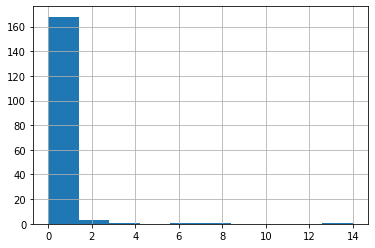

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count